In [1]:
#50. 単語ベクトルの読み込みと表示
"""Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ、300次元）をダウンロードし、
”United States”の単語ベクトルを表示せよ。ただし、”United States”は内部的には”United_States”と表現されていることに注意せよ。
"""
from gensim.models import KeyedVectors
word2vector = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary = True)


In [2]:
#50. 単語ベクトルの読み込みと表示
"""Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ、300次元）をダウンロードし、
”United States”の単語ベクトルを表示せよ。ただし、”United States”は内部的には”United_States”と表現されていることに注意せよ。
"""
word2vector["United_States"]

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

In [3]:
#51. 単語の類似度
"“United States”と”U.S.”のコサイン類似度を計算せよ。"
word2vector.similarity("United_States", "U.S.")

0.73107743

In [4]:
#52. 類似度の高い単語10件
#“United States”とコサイン類似度が高い10語と、その類似度を出力せよ。
word2vector.most_similar("United_States", topn = 10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400724291801453),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

In [5]:
#53. 加法構成性によるアナロジー
"“Spain”の単語ベクトルから”Madrid”のベクトルを引き、”Athens”のベクトルを足したベクトルを計算し、そのベクトルと類似度の高い10語とその類似度を出力せよ。"
word2vector.most_similar(positive = ["Spain", "Madrid"],
                         negative = ["Athens"],
                         topn = 10
                         )


[('Spains', 0.6056790351867676),
 ('Barcelona', 0.6044401526451111),
 ('Spaniards', 0.5837482213973999),
 ('Málaga', 0.5805597901344299),
 ('Malaga', 0.5797935724258423),
 ('Spanish', 0.5793159604072571),
 ('Catalan', 0.5683084726333618),
 ('San_Sebastián', 0.5657953023910522),
 ('Salave_Gold_Deposit', 0.5624399185180664),
 ('Inveravante_Inversiones_SL', 0.560633659362793)]

In [29]:
#54. アナロジーデータでの実験
"""単語アナロジーの評価データをダウンロードし、国と首都に関する事例（: capital-common-countriesセクション）に対して
vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し、そのベクトルと類似度が最も高い単語と、その類似度を求めよ。求めた単語と類似度は、各事例と一緒に記録せよ。"""
import pandas as pd
from tqdm import tqdm
with open("questions-words.txt", "r", encoding = "utf-8") as f:
    lines = f.readlines()
data = []
for idx, line in enumerate(lines):
    if idx > 0 and line :
        line = line.replace("\n","").split(" ")
        data.append(line)
data = pd.DataFrame(data)
data = data.dropna()
all_words = word2vector.index_to_key  
vectors = word2vector.vectors         
result = []
similarity = []
for i in tqdm(range(len(data[:1000]))): 
    w1 = data.iloc[i, 0]
    w2 = data.iloc[i, 1]
    w3 = data.iloc[i, 2]
    most_similar_word = word2vector.most_similar(
        positive = [w2, w3],
        negative = [w1],
        topn = 1
    )
    result.append(most_similar_word[0][0])
    similarity.append(most_similar_word[0][1])
sample =  data[:1000].assign(most_similar = result, similarity = similarity)
sample

100%|██████████| 1000/1000 [03:05<00:00,  5.38it/s]


,0,1,2,3,most_similar,similarity
0,Athens,Greece,Baghdad,Iraq,Iraqi,0.635187
1,Athens,Greece,Bangkok,Thailand,Thailand,0.713767
2,Athens,Greece,Beijing,China,China,0.723578
3,Athens,Greece,Berlin,Germany,Germany,0.673462
4,Athens,Greece,Bern,Switzerland,Switzerland,0.491975
...,...,...,...,...,...,...
996,Baku,Azerbaijan,Dakar,Senegal,Dakar_Rally,0.681278
997,Baku,Azerbaijan,Damascus,Syria,Syria,0.819194
998,Baku,Azerbaijan,Dhaka,Bangladesh,Bangladesh,0.819592
999,Baku,Azerbaijan,Doha,Qatar,Qatar,0.640313


In [46]:
#55. アナロジータスクでの正解率
"54の実行結果を用い、意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ。"
correct = 0
for i in range(len(sample)):
    gold = sample.iloc[i, 3]
    pred = sample.iloc[i, 4]
    if gold == pred:
        correct += 1
accuracy = correct / len(sample)
print(f"正解率は{accuracy}")

正解率は0.788


In [60]:
#56. WordSimilarity-353での評価
"The WordSimilarity-353 Test Collectionの評価データをダウンロードし、単語ベクトルにより計算される類似度のランキングと、人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ。"
from scipy.stats import spearmanr
dev_data = pd.read_csv("combined.csv")
human_scores = []
model_scores = []
for i in tqdm(range(len(dev_data))):
    w1, w2, human = dev_data.iloc[i, 0], dev_data.iloc[i, 1], dev_data.iloc[i, 2]
    similarity = word2vector.similarity(w1, w2)
    human_scores.append(human)
    model_scores.append(similarity)

corr = spearmanr(human_scores, model_scores)
print(f"スピアマン相関係数は{corr.statistic}")

100%|██████████| 353/353 [00:00<00:00, 18561.66it/s]

スピアマン相関係数は0.7000166486272194


In [95]:
#57. k-meansクラスタリング
#国名に関する単語ベクトルを抽出し、k-meansクラスタリングをクラスタ数k=5として実行せよ。
from sklearn.cluster import KMeans
import numpy as np
data = data[:5030].dropna()
country = list(set(data[3]))
country_vector = []
for c in country:
    country_vector.append(word2vector[c])
Km = KMeans(n_clusters = 5, random_state = 42, n_init = "auto")
label = Km.fit_predict(X = country_vector)
result = pd.DataFrame({"country":country, "cluster": label}).sort_values("cluster")
result[result["cluster"] == 0]["country"]

98           Nepal
48        Pakistan
100          China
102         Bhutan
103        Vietnam
78        Thailand
34           Japan
97     Philippines
26      Bangladesh
112           Laos
1             Fiji
43          Taiwan
3        Indonesia
Name: country, dtype: object

         country  cluster
27       Ireland        1
86      Portugal        1
90     Greenland        1
49       Germany        1
92       Austria        1
..           ...      ...
51   Afghanistan        5
89         Qatar        5
52         Syria        5
100        China        5
34         Japan        5

[116 rows x 2 columns]


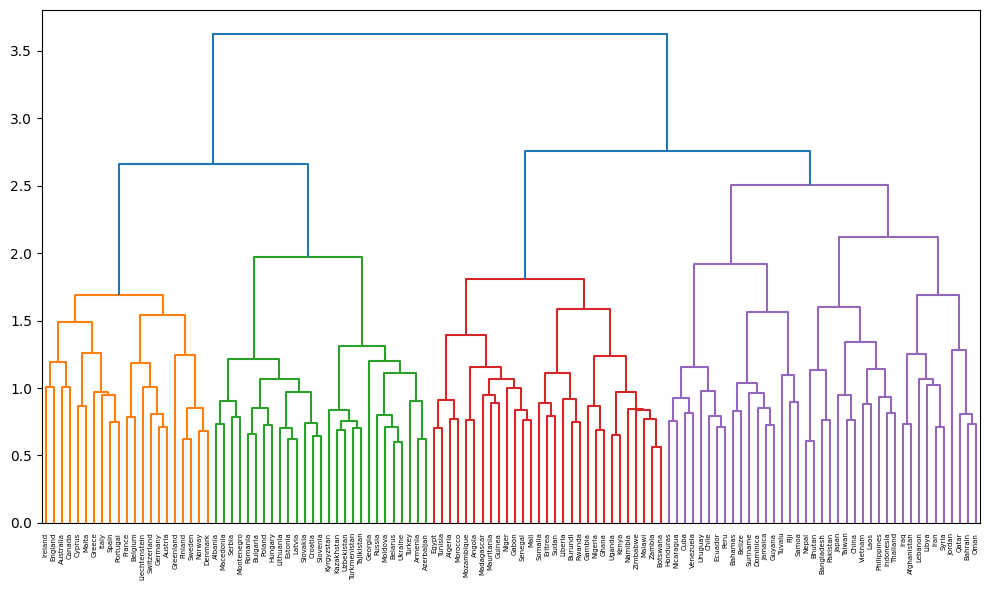

In [97]:
#58. Ward法によるクラスタリング
"国名に関する単語ベクトルに対し、Ward法による階層型クラスタリングを実行せよ。さらに、クラスタリング結果をデンドログラムとして可視化せよ。"
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

Xn = normalize(country_vector, norm="l2")
cluster = AgglomerativeClustering(n_clusters = 5, linkage = "ward", metric = "euclidean")
labels = cluster.fit_predict(Xn)
result = pd.DataFrame({"country":country, "cluster": labels})

# Ward 法で連結
Z = linkage(Xn, method="ward")  # ユークリッド距離前提

# k=5 のクラスタ割り当て（最大クラス数基準）
labels = fcluster(Z, t=5, criterion="maxclust")

df = pd.DataFrame({"country": country, "cluster": labels}).sort_values("cluster")
print(df)

# デンドログラム可視化（大きい場合は truncate オプションを使うと見やすい）
plt.figure(figsize=(10, 6))
dendrogram(Z, labels = country, leaf_rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#59. t-SNEによる可視化
#ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ。
from sklearn.manifold import TSNE

X = np.array(country_vector)
tsne = TSNE(random_state=0, metric="cosine")
embs = tsne.fit_transform(X)
plt.scatter(embs[:, 0], embs[:, 1])
plt.show()

TypeError: TSNE.__init__() got an unexpected keyword argument 'n_iter'